In [1]:
import pycalphad
print(pycalphad.__version__)

0.1.dev1968+g9b64c32


In [2]:
from pycalphad import Workspace, Database, variables as v
from pycalphad.property_framework import IsolatedPhase

In [3]:
# To calculate Jansson derivatives, we first establish a Workspace with the specified conditions and then use "get" to run the equilibrium and 
# derivative calculation
# Here, I have specified the same composition at various temperatures, so the output of any "get" will be a vector
wks = Workspace(database=Database('HF_NB_TI_V.TDB'), components=['HF', 'NB', 'TI', 'V'], phases=['BCC_A2'],
                 conditions={v.X('HF'): 0.25,v.X('NB'): 0.25, v.X('TI'): 0.25, v.T: (300,3000,50), v.P: 101325})

# We need to make sure that we use IsolatedPhase so that the minimizer does not give us a solution with phase separation, but rather stays on the 
# free energy surface. First derivatives of the free energy wrt composition can be calculated with a Jansson derivative or by the relationship
# dG/dx_A = mu_A - mu_B where B is the dependent component
ip = IsolatedPhase('BCC_A2', wks=wks)
dG_dx_HF_option1 = wks.get(ip('GM.X(HF)'))
dG_dx_HF_option2 = wks.get(ip('MU(HF)')) - wks.get(ip('MU(V)'))

# derivatives of chemical potential are found similarly
dmuHF_dx_HF = wks.get(ip('MU(HF).X(HF)'))

/Users/attari.v/Documents/PROJECTS/pycalphad/pycalphad/io/tdb.py:995: UserWarning: The type definition character `%` was defined in the following phases: ['BCC_A2', 'HCP_A3'], but no corresponding TYPE_DEFINITION line was found in the TDB.
  warnings.warn(f"The type definition character `{typechar}` was defined in the following phases: "


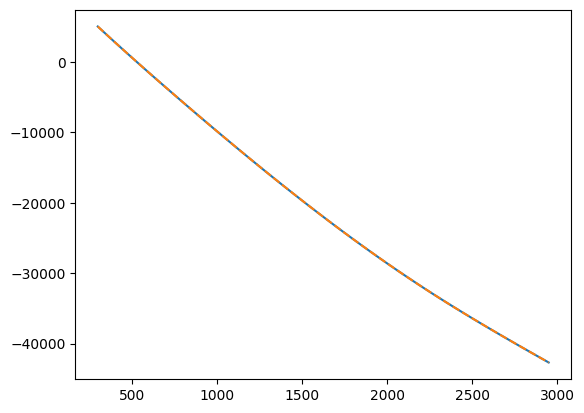

In [4]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(0)
plt.plot(np.arange(300,3000,50), dG_dx_HF_option1)
plt.plot(np.arange(300,3000,50), dG_dx_HF_option2, linestyle = 'dashed')

In [5]:
G = wks.get(ip('GM'))

Text(0.5, 1.0, 'Molar Gibbs Energy of BCC_A2 at fixed composition')

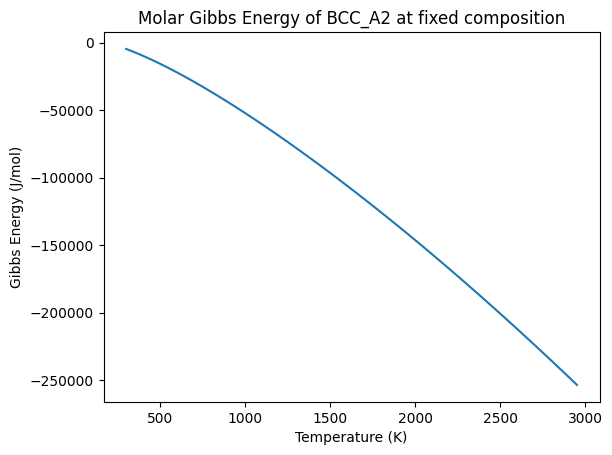

In [6]:
plt.figure(1)
plt.plot(np.arange(300,3000,50), G)
plt.xlabel("Temperature (K)")
plt.ylabel("Gibbs Energy (J/mol)")
plt.title("Molar Gibbs Energy of BCC_A2 at fixed composition")

Text(0, 0.5, 'GM')

/opt/homebrew/anaconda3/envs/pycalphad-env-custom/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/homebrew/anaconda3/envs/pycalphad-env-custom/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


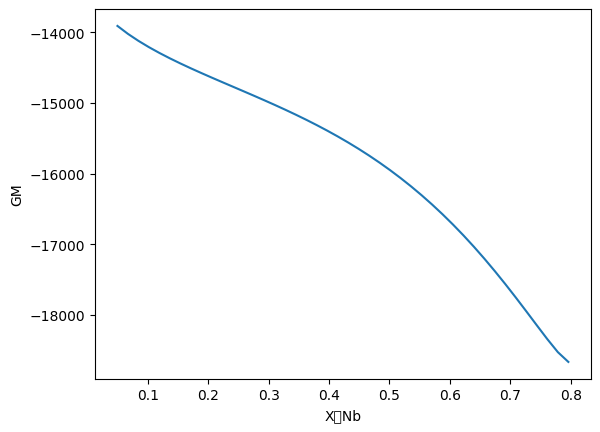

In [7]:
x_nb = np.linspace(0.05, 0.90, 50)
G = []
for x in x_nb:
    wks = Workspace(database=Database('HF_NB_TI_V.TDB'), components=['HF', 'NB', 'TI', 'V'], phases=['BCC_A2'],
            conditions={v.X('HF'): 0.15, v.X('NB'): x, v.X('TI'): 0.05, v.T: 500, v.P: 101325})
    ip = IsolatedPhase('BCC_A2', wks=wks)
    G.append(wks.get(ip('GM')))
plt. plot(x_nb,G)
plt.xlabel('X（Nb')
plt.ylabel('GM')

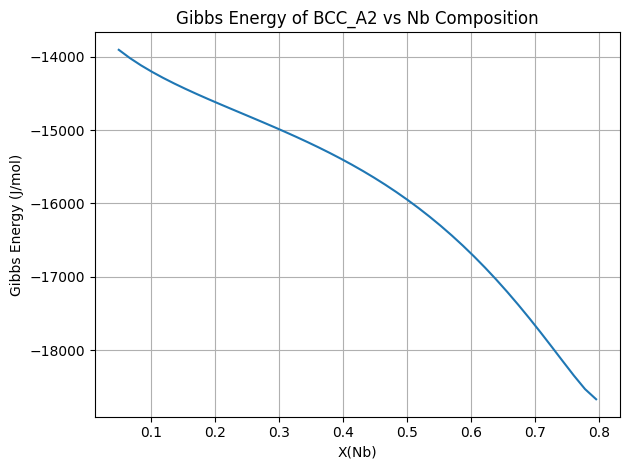

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from pycalphad import Workspace, Database, variables as v
#from pycalphad.workspace.solution_managers import IsolatedPhase

# Sweep over Nb composition
x_nb = np.linspace(0.05, 0.90, 50)
G = []

for x in x_nb:
    wks = Workspace(
        database=Database('HF_NB_TI_V.TDB'),
        components=['HF', 'NB', 'TI', 'V'],
        phases=['BCC_A2'],
        conditions={
            v.X('HF'): 0.15,
            v.X('NB'): x,
            v.X('TI'): 0.05,
            v.T: 500,
            v.P: 101325
        }
    )
    ip = IsolatedPhase('BCC_A2', wks=wks)
    G.append(wks.get(ip('GM')).squeeze())  # Remove singleton dims

# Plotting
plt.plot(x_nb, G)
plt.xlabel('X(Nb)')
plt.ylabel('Gibbs Energy (J/mol)')
plt.title('Gibbs Energy of BCC_A2 vs Nb Composition')
plt.grid(True)
plt.tight_layout()
plt.show()

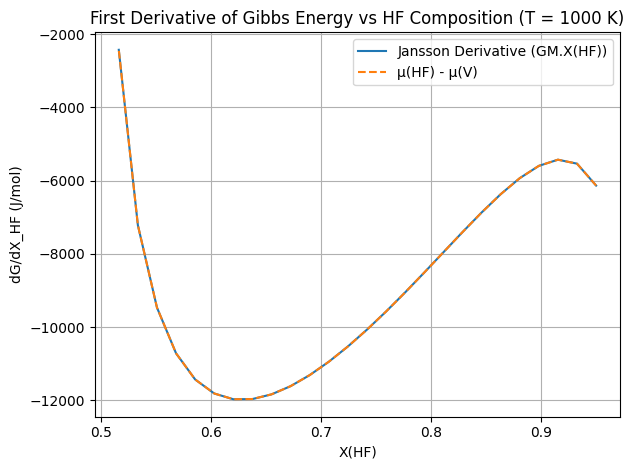

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from pycalphad import Workspace, Database, variables as v#, IsolatedPhase

# Sweep over HF composition (0.05 to 0.90)
x_hf = np.linspace(0.05, 0.90, 50)

# Lists to store derivatives
dG_dx_HF_opt1 = []
dG_dx_HF_opt2 = []

# Loop over composition values
for x in x_hf:
    wks = Workspace(
        database=Database('HF_NB_TI_V.TDB'),
        components=['HF', 'NB', 'TI', 'V'],
        phases=['BCC_A2'],
        conditions={
            v.X('HF'): x,
            v.X('NB'): 0.25,
            v.X('TI'): 0.25,
            v.T: 1000,       # fixed temperature
            v.P: 101325
        }
    )
    ip = IsolatedPhase('BCC_A2', wks=wks)
    d1 = wks.get(ip('GM.X(HF)')).squeeze()
    d2 = (wks.get(ip('MU(HF)')) - wks.get(ip('MU(V)'))).squeeze()
    
    dG_dx_HF_opt1.append(d1)
    dG_dx_HF_opt2.append(d2)

# Plot
plt.figure()
plt.plot(x_hf, dG_dx_HF_opt1, label='Jansson Derivative (GM.X(HF))')
plt.plot(x_hf, dG_dx_HF_opt2, '--', label='μ(HF) - μ(V)')
plt.xlabel('X(HF)')
plt.ylabel('dG/dX_HF (J/mol)')
plt.title('First Derivative of Gibbs Energy vs HF Composition (T = 1000 K)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

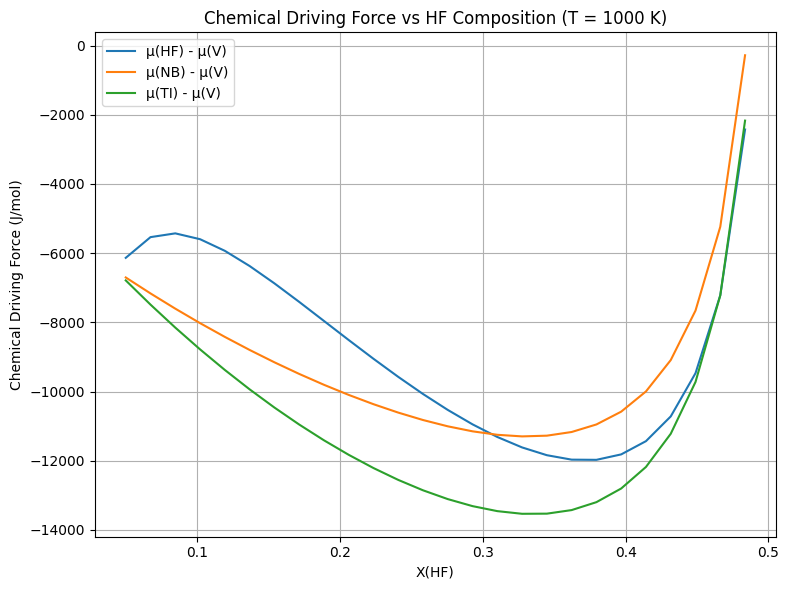

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from pycalphad import Workspace, Database, variables as v

# Sweep over HF composition
x_hf = np.linspace(0.05, 0.90, 50)

# Initialize dict to hold chemical driving forces for all elements
driving_forces = {el: [] for el in ['HF', 'NB', 'TI', 'V']}

# Loop over compositions
for x in x_hf:
    wks = Workspace(
        database=Database('HF_NB_TI_V.TDB'),
        components=['HF', 'NB', 'TI', 'V'],
        phases=['BCC_A2'],
        conditions={
            v.X('HF'): x,
            v.X('NB'): 0.25,
            v.X('TI'): 0.25,
            v.T: 1000,
            v.P: 101325
        }
    )
    ip = IsolatedPhase('BCC_A2', wks=wks)

    # Reference chemical potential (e.g., V)
    mu_ref = wks.get(ip('MU(V)')).squeeze()

    # Driving force: mu_i - mu_ref
    for el in driving_forces:
        mu_i = wks.get(ip(f'MU({el})')).squeeze()
        driving_forces[el].append(mu_i - mu_ref)

# Plotting
plt.figure(figsize=(8, 6))
for el, values in driving_forces.items():
    if el != 'V':  # V will have zero driving force (mu_i - mu_i = 0)
        plt.plot(x_hf, values, label=f'μ({el}) - μ(V)')

plt.xlabel('X(HF)')
plt.ylabel('Chemical Driving Force (J/mol)')
plt.title('Chemical Driving Force vs HF Composition (T = 1000 K)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()